## PROGRAMMING TOOLS 


### GeoPandas

GeoPandas (http://geopandas.org/) is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by [shapely](https://shapely.readthedocs.io/en/stable/) and [fiona](https://fiona.readthedocs.io/en/latest/manual.html). 


The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas.

The main difference between geodataframes and pandas dataframes is that a [geodataframe](http://geopandas.org/data_structures.html#geodataframe) contains a column to store geometries. By default, the name of this column is `'geometry'`. 

### Data

The data used in this lab is collected from http://www.adzuna.co.uk/ using [***Adzuna API***](https://developer.adzuna.com/) for UK. 

The data has been subselected to `location_area_1` containing Scotland value. 

In [1]:
import pandas as pd
import pyarrow.parquet as pq

In [2]:
source= './adzuna_scotland.parquet'

In [3]:
#open dataset stored in parquet format
df = pq.read_table(source=source).to_pandas()

In [4]:
df.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,location_area_0,location_area_1,location_area_2,contract_type,longitude,latitude,location_area_3,location_area_4,location_area_5,scraped_date
86,26480.77,full_time,Boots,Healthcare & Nursing Jobs,healthcare-nursing-jobs,1,Relief Pharmacist – Greater Glasgow,1610439635,Need to know We are looking for a fantastic Ph...,2020-07-21T08:37:58Z,...,UK,Scotland,West Dunbartonshire,None,-4.550980,55.949402,Dumbarton,None,None,21072020
385,16742.00,None,The Best Connection,Logistics & Warehouse Jobs,logistics-warehouse-jobs,0,Mill Operative,1596834392,"We are recruiting for hard working, reliable a...",2020-07-08T06:09:13Z,...,UK,Scotland,Dumfries & Galloway,contract,-3.355940,55.120201,Lockerbie,None,None,21072020
514,17928.62,full_time,Morrisons,Part time Jobs,part-time-jobs,1,SUPPORT PHARMACIST - COWDENBEATH (PART TIME),1610442709,We&rsquo;ve got a fantastic opportunity for a ...,2020-07-21T08:39:32Z,...,UK,Scotland,Fife,None,-3.343290,56.110199,Cowdenbeath,None,None,21072020
850,37047.00,full_time,South Ayrshire,Social work Jobs,social-work-jobs,0,Social Worker (Children & Families) - Whitlett...,1610804167,Job Description What is the role? To promote a...,2020-07-21T14:41:13Z,...,UK,Scotland,South Ayrshire,permanent,-4.607136,55.469722,Ayr,Ayr Central,None,21072020
1030,31800.00,None,NHS National Services Scotland,Healthcare & Nursing Jobs,healthcare-nursing-jobs,0,Midwife - Direct Care - Gracemount Medical Centre,1608261071,NHS Lothian is committed to encouraging equali...,2020-07-18T13:20:27Z,...,UK,Scotland,Midlothian,permanent,-3.202320,55.858501,Penicuik,Milton Bridge,Edinburgh Technopole,21072020


In [5]:
df.dtypes

salary_min               float64
contract_time             object
company_display_name      object
category_label            object
category_tag              object
salary_is_predicted        int64
title                     object
id                         int64
description               object
created                   object
adref                     object
salary_max               float64
location_display_name     object
location_area_0           object
location_area_1           object
location_area_2           object
contract_type             object
longitude                float64
latitude                 float64
location_area_3           object
location_area_4           object
location_area_5           object
scraped_date               int64
dtype: object

We are going to convert `DataFrame` into `GeoDataframe` to be able to perform geospatial analysis.

The convention is to `import geopandas as gpd`

GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and descartes and matplotlib for plotting.

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

In [7]:
#creating geodataframe

gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))

In [8]:
gdf.head()

      salary_min contract_time            company_display_name  \
86      26480.77     full_time                           Boots   
385     16742.00          None             The Best Connection   
514     17928.62     full_time                       Morrisons   
850     37047.00     full_time                  South Ayrshire   
1030    31800.00          None  NHS National Services Scotland   

                  category_label              category_tag  \
86     Healthcare & Nursing Jobs   healthcare-nursing-jobs   
385   Logistics & Warehouse Jobs  logistics-warehouse-jobs   
514               Part time Jobs            part-time-jobs   
850             Social work Jobs          social-work-jobs   
1030   Healthcare & Nursing Jobs   healthcare-nursing-jobs   

      salary_is_predicted                                              title  \
86                      1                Relief Pharmacist – Greater Glasgow   
385                     0                                     Mill Ope

In [9]:
print(gdf.crs)

None


### Map Projections and CRS

Map projections try to portray the surface of the earth, or a portion of the earth, on a flat piece of paper or computer screen. In layman’s term, map projections try to transform the earth from its spherical shape (3D) to a planar shape (2D).

A coordinate reference system (CRS) then defines how the two-dimensional, projected map in your GIS relates to real places on the earth. The decision of which map projection and CRS to use depends on the regional extent of the area you want to work in, on the analysis you want to do, and often on the availability of data. [Source](https://docs.qgis.org/3.16/en/docs/gentle_gis_introduction/coordinate_reference_systems.html#)

![Distortions of the surface using different projections](map_projections.png)
[Source](http://bl.ocks.org/vlandham/raw/9216751/)

We are going to set coordinates to WGS84 (lon/lat) using `set_crs` and a EPSG (European Petroleum Survey Group) code  `epsg` of the coornate system. 

In [ ]:
gdf.set_crs(epsg=4326, inplace=True)

In [11]:
print(gdf.crs)

epsg:4326


**More about CRS**  

- https://spatialreference.org/ref/epsg/ 
- https://proj.org/operations/projections/

### Visualisation

Let's visualise and  explore the  data on the map. Geopandas  uses matplotlib library for plotting data. Similarly to plotting `DataFrame`, to create a baic map from a `GeoDataFrame`  use ``.plot()``

**This function in GeoPandas creates a map based on the geometry columna**. 


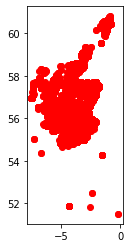

In [12]:
# plot the GeoDataFrame
gdf.plot( color='red')

plt.show()

In [13]:
#VERY SLOW
# Let's build spatial index for intersection points
gdf_sindex = gdf.sindex

# Let's check what type it is
gdf_sindex

rtree.index.Index(bounds=[-7.497413000000001, 51.503378000000005, -0.13913399999999998, 60.79740699999999], size=165343)

### Open different file formats of spatial data

We are going to load boundary of scotland to remove outliers using Free OS data [BoundaryLine](https://www.ordnancesurvey.co.uk/business-government/products/boundaryline)


Geopandas can read almost any vector-based spatial data format including ESRI shapefile, GeoJSON files and more using the command:

`geopandas.read_file()`


which returns a GeoDataFrame object.
[More info](https://geopandas.org/io.html)

In [14]:
os_data=gpd.read_file('./district_borough_unitary.shp')

#if loading full dataset use this: 
#os_data = gpd.read_file("bdline_gb.gpkg", layer='bdline_gb district_borough_unitary')

In [15]:
#check the CRS
os_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: UK - Britain and UKCS 49°45'N to 61°N, 9°W to 2°E
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

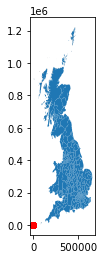

In [16]:
#Visualisation of the data
ax1 = os_data.plot()

## adding both datasets together
gdf.plot( color='red',ax = ax1)

plt.show()

Firstly, let's make the plot bigger

In [ ]:
# Control figure size in here
fig, ax = plt.subplots(figsize=(12,8))

C:\Users\ng93n\AppData\Local\Continuum\anaconda3\envs\gis_lab\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 23 is not valid for the current tile provider (valid zooms: 0 - 19).
  warnings.warn(msg)


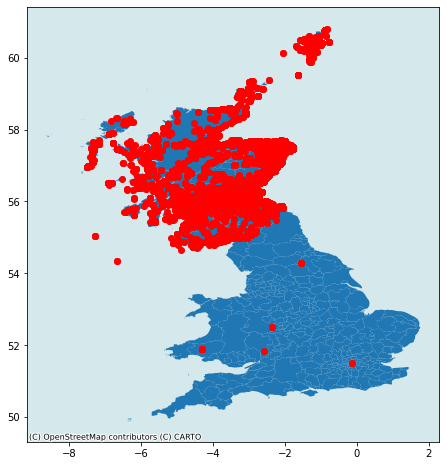

In [17]:
#Reprojecting to align with background mapping
os_data_wgs84 = os_data.to_crs(epsg=4326)

# Plot the data
os_data_wgs84.plot(ax=ax)
gdf.plot(color = 'red',ax=ax)
# Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Voyager)

In [18]:
#full list of available backgrounds
# ctx.providers.keys()

In [19]:
#removing outliers by selecting only those inside the scotland
os_data_wgs84.head()

In [20]:
#grouping data by first letter of census code
#os_data_wgs84.groupby(os_data_wgs84['Census_Cod'].str.get(0))['Census_Cod'].count()

In [21]:
# scotland = os_data_wgs84[(os_data_wgs84['Census_Cod'].str[0]=='S')]

In [22]:
#visual check
#scotland.plot()

In [23]:
#diss = (os_data_wgs84['Census_Cod'].str[0]=='S')

In [24]:
# dissolve the country boundary 
#sc = os_data_wgs84.dissolve(by=diss)

In [25]:
#sc.plot()

In [27]:
#assert sc.crs == gdf.crs

### Spatial Join 

https://geopandas.org/mergingdata.html#spatial-joins

In [31]:
# Select Glasgow data
glasgow = os_data_wgs84.loc[os_data_wgs84['Name']=='Glasgow City']

<AxesSubplot:>

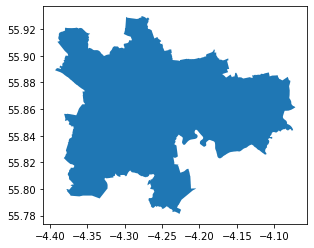

In [32]:
glasgow.plot()

In [33]:
glasgow.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:

# Make a spatial join
join = gpd.sjoin(gdf, glasgow, how="inner", op="within")

<AxesSubplot:>

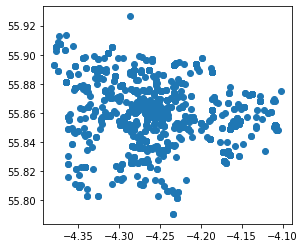

In [35]:
join.plot()

In [36]:
len(join)

3736

In [37]:
#examine what's inside

join.head()

,salary_min,contract_time,company_display_name,category_label,category_tag,salary_is_predicted,title,id,description,created,...,Collection,Global_Pol,Admin_Unit,Census_Cod,Hectares,Non_Inland,Area_Type_,Area_Typ_1,Non_Area_T,Non_Area_1
22709,34866.10,None,Ashurst,IT Jobs,it-jobs,1,Data Analyst,1610942278,About Ashurst: Ashurst is a leading global law...,2020-07-21T17:18:08Z,...,105,81237,30631,S12000049,17635.598,173.468,AA,CIVIL ADMINISTRATION AREA,None,None
28484,26121.94,None,Dentons,Legal Jobs,legal-jobs,1,"Contract Analyst (Paralegal), Commercial - Gla...",1610942368,Purpose of role An exciting opportunity has ar...,2020-07-21T17:18:19Z,...,105,81237,30631,S12000049,17635.598,173.468,AA,CIVIL ADMINISTRATION AREA,None,None
61760,54337.07,None,RX+ Medical,Healthcare & Nursing Jobs,healthcare-nursing-jobs,1,ST3 - General Medical (Non-Cons),1588810059,RX Medical is seeking a qualified doctor to fi...,2020-06-30T15:56:10Z,...,105,81237,30631,S12000049,17635.598,173.468,AA,CIVIL ADMINISTRATION AREA,None,None
76322,15763.00,full_time,Search Consultancy LTD,Customer Services Jobs,customer-services-jobs,0,Customer Service Advisor,1603084362,Inbound customer service advisor Hours availab...,2020-07-14T12:11:09Z,...,105,81237,30631,S12000049,17635.598,173.468,AA,CIVIL ADMINISTRATION AREA,None,None
84629,71701.62,None,MORGAN STANLEY,IT Jobs,it-jobs,1,Cyber Security Response Manager,1612006355,Job Description - Cyber Security Response Mana...,2020-07-22T15:35:15Z,...,105,81237,30631,S12000049,17635.598,173.468,AA,CIVIL ADMINISTRATION AREA,None,None


In [38]:
#most popular category of jobs
join.groupby('category_label')['salary_min'].mean().reset_index().sort_values(by='salary_min')

,category_label,salary_min
12,Hospitality & Catering Jobs,13897.645323
28,Travel Jobs,14973.143871
5,Customer Services Jobs,17078.804211
20,Part time Jobs,17105.807903
6,Domestic help & Cleaning Jobs,17333.991642
25,Social work Jobs,19498.079889
15,Logistics & Warehouse Jobs,19714.071587
17,Manufacturing Jobs,19759.344074
26,Teaching Jobs,21184.034659
22,Retail Jobs,21794.325500


### Additional visualisation libraries

[**geoplot**](https://residentmario.github.io/geoplot/index.html)

In [39]:
import geoplot

C:\Users\ng93n\AppData\Local\Continuum\anaconda3\envs\gis_lab\lib\site-packages\geoplot\crs.py:79: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})
C:\Users\ng93n\AppData\Local\Continuum\anaconda3\envs\gis_lab\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\ng93n\AppData\Local\Continuum\anaconda3\envs\gis_lab\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


<GeoAxesSubplot:>

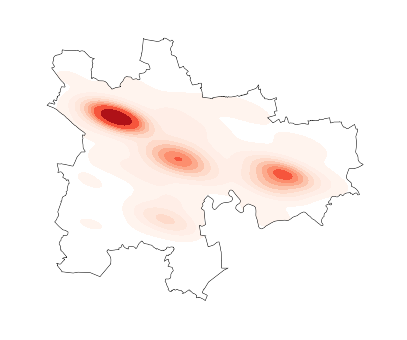

In [45]:
ax = geoplot.kdeplot( join, clip=glasgow.geometry,shade=True, cmap='Reds',projection=geoplot.crs.OSGB())
    
geoplot.polyplot(glasgow, ax=ax, zorder=1)

C:\Users\ng93n\AppData\Local\Continuum\anaconda3\envs\gis_lab\lib\site-packages\geoplot\crs.py:79: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})


<GeoAxesSubplot:>

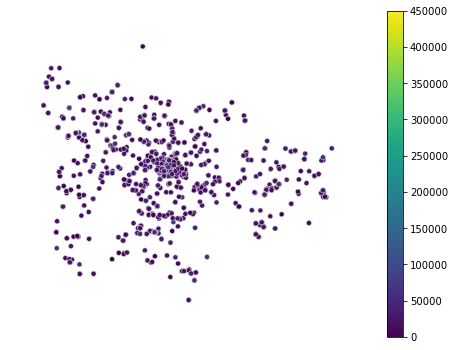

In [73]:
geoplot.pointplot(
    join, projection=geoplot.crs.OSGB(),
    hue='salary_min',
    legend=True, 
    edgecolor='lightgray', linewidth=0.5
)

[**mapclassify**](https://pysal.org/notebooks/viz/mapclassify/intro.html)  to classify data and aplly classification schemes for Choropleth Maps 

In [75]:
import mapclassify as mc
scheme = mc.Quantiles(join['salary_min'])

C:\Users\ng93n\AppData\Local\Continuum\anaconda3\envs\gis_lab\lib\site-packages\geoplot\crs.py:79: UserWarning: The default value for the *approx* keyword argument to OSGB will change from True to False after 0.18.
  return getattr(ccrs, self.__class__.__name__)(**{**centerings, **self.args})


<GeoAxesSubplot:>

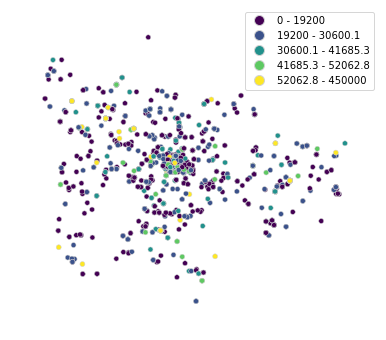

In [76]:
geoplot.pointplot(
    join, projection=geoplot.crs.OSGB(),
    hue='salary_min',
    legend=True,
    edgecolor='lightgray', linewidth=0.5, scheme=scheme
)